# Lesson 1 - Introduction to pandas and seaborn

> How to use the pandas and seaborn libraries to load CSV data into Python, calculate descriptive statistics, and make simple visualisations.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lewtun/dslectures/master?urlpath=lab/tree/notebooks/lesson01_intro-to-pandas.ipynb) 
[![slides](https://img.shields.io/static/v1?label=slides&message=lesson01_intro-to-ds-and-ml.pdf&color=blue&logo=Google-drive)](https://drive.google.com/file/d/14bPRdbbf_CjDOfG8rBbSBQO-dDpxDj2G/view)

## Learning objectives

* Gain an introduction to the `DataFrame` data structure of the pandas library
* Import CSV data into a pandas `DataFrame`
* Calculate descriptive statistics with pandas
* Generate histogram, scatter, and correlation plots with the seaborn library

## References

* Chapter 2 of _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ by Aurèlien Geron.

## What is pandas?

<div style="text-align: center">
<img src='images/pandas.jpeg' width='400'>
<p style="text-align: center;"> <b>Figure:</b> Not a Python library. </p>
</div>


[pandas](https://pandas.pydata.org/) is one of the most popular Python libraries in data science and for good reasons. It provides high-level data structures and functions that are designed to make working with _structured_ or _tabular_ data fast, easy, and expressive. In particular, pandas provides fancy indexing capabilities that make it easy to reshape, slice and dice, perform aggregregations, and select subsets of data (and more!). Since data manipulation and cleaning are such important skills in data science, pandas will be one of the primary focuses in the first half of this module.

The two workhorse data structures of pandas are:

* `Series`: a one-dimensional array-like object that contains a sequence of values and an associated array of data labels, called its _index_;
* `DataFrame`: a rectangular table of data that contains an ordered collection of column, each of which can be a different typ (numeric, string, boolean etc). It has both a row and a column _index_ and can be thought of as a `dict` of `Series` all sharing the same index.

As a rough idea, you can think of `DataFrame` objects as "tables" and `Series` objects as vectors or columns of a table. (The analogy isn't perfect because you can actually use `DataFrame` objects to represent higher dimensional data using _hierarchical indexing_; we will learn about this later in the module.) A graphical representation of these data structures is shown in the figure below.


<br>

<div style="text-align: center">
<img src='images/dataframe-series.png' width='700'>
<p style="text-align: center;"> <b>Figure:</b> Graphical representation of the <code>Series</code> and <code>DataFrame</code> objects in pandas. </p>
</div>


Throughout this module, we will use the following import statement for pandas
```python
import pandas as pd
```
which is the accepted convention in the community. Thus whenever you see `pd` in code, you know it's referring to pandas.



## Import libraries

To use any Python library in your code you first have to make it accessible, i.e. you have to _import_ it. For example, executing
```python
current_time = datetime.datetime.now()
```
in a cell block will return `NameError: name 'datetime' is not defined`. Evidently native Python doesn't know what `datetime` means. In general, for any object to be defined, it has to be accessible within the current _scope_, namely:

1. It belongs to Python's default environment. These are the in-built functions and containers we saw in lesson 1, e.g. `str`, `print`, `list` etc.
2. It has been defined in the current program, e.g. when you create a custom function with the `def` keyword.
3. It exists as a separate libary and you imported the library with a suitable `import` statement.

Item (3) explains why `datetime` was not defined: it is a separate [library](https://docs.python.org/3/library/datetime.html) that must be imported before we can access its functionality. Thus the solution to our error above is to execute
```python
import datetime
current_time = datetime.datetime.now()
current_time.isoformat()
```
which should return a datetime string in [ISO format](https://en.wikipedia.org/wiki/ISO_8601) like `'2019-02-24T13:15:33.512181'`. See [this article](https://www.codementor.io/sheena/python-path-virtualenv-import-for-beginners-du107r3o1) for a nice summary about imports and what scope means in the context of Python.

In [18]:
# reload modules before executing user code
%load_ext autoreload
# reload all modules every time before executing Python code
%autoreload 2
# render plots in notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# data wrangling
import pandas as pd
from pathlib import Path
from dslectures.core import get_dataset

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

---

**You should know**

In addition to the standard data science libraries, we have also imported Python's `pathlib` module since it provides an object oriented interface to the file system that is intuitive and platform independent (i.e. it works equally well with Windows, mac OS, or Unix/Linux). See [this article](https://pbpython.com/pathlib-intro.html) for a nice overview of what `pathlib` is and why it's awesome.

---

## Load data

To get warmed up, we will use the [California Housing dataset](https://www.kaggle.com/camnugent/california-housing-prices), which contains 10 explanatory variables describing aspects of residential homes in California from the 1990s. The goal will be to read the data using pandas and use the library's functions to extract descriptive statistics in a fast manner.

First we need to fetch the dataset from Google Drive - we can do that by running the following function:

In [20]:
get_dataset('housing')

Download of housing dataset complete.


To load our dataset we need to tell pandas where to look for it. First, lets have a look at what we have in the `data/` directory:

In [21]:
DATA = Path('../data/')
!ls {DATA}

'housing (1).csv'   housing.csv


---

**You should know**

Starting a line in a Jupyter notebook with an exclamation point `!`, or bang, tells Jupyter to execute everything after the bang in the system shell. This means you can delete files, change directories, or execute any other process.

A very powerful aspect of bangs is that the output of a shell command can be assigned to a variable! For example:

In [22]:
contents = !ls {DATA}
contents

['housing (1).csv', 'housing.csv']

In [23]:
directory = !pwd
directory

['/home/jovyan/notebooks']

---

With pathlib it is a simple matter to define the filepath to the housing dataset, and since the file is in CSV format we can load it as a pandas `DataFrame` as follows:

In [24]:
housing_data = pd.read_csv(DATA/'housing.csv')

## Inspect data

This first thing we recommend after creating a `DataFrame` is to inspect the first/last few rows to make sure there's no surprises in the data format that need to be dealt with. For example, one often finds metadata or aggregations at the end of Excel files, and this can cause problems if not handled correctly.

### Head


The `DataFrame.head` method displays the _first_ five rows of a `DataFrame`:

In [25]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


If we want to see more rows, we just pass an integer argument to the method as follows:

In [26]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Tail
Similar to `DataFrame.head`, the `DataFrame.tail` method returns the _last_ five rows of a `DataFrame`:

In [27]:
housing_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Sample
Sometimes it is useful to generate a _random sample_ from the `DataFrame`, which can be achieved as follows:

In [28]:
# random_state is the seed for the random number generator
housing_data.sample(n=5, random_state=42)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


#comm_mla

`random_state` makes it possible to get always the same random samples. In other words it is the "ID" of the random sample picking

In [29]:
housing_data.sample(n=5, random_state=4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6939,-118.10,33.99,36.0,1529.0,290.0,1271.0,287.0,3.6875,175200.0,<1H OCEAN
8032,-118.13,33.83,44.0,1710.0,333.0,786.0,344.0,4.2917,314700.0,<1H OCEAN
18877,-122.23,38.09,26.0,4397.0,997.0,2539.0,965.0,2.4875,90000.0,NEAR BAY
4882,-118.26,34.02,38.0,980.0,285.0,1308.0,310.0,1.5652,123100.0,<1H OCEAN
5409,-118.44,34.03,41.0,1164.0,265.0,561.0,251.0,4.2411,350900.0,<1H OCEAN


### Info
The `DataFrame.info` method is useful to get a quick description of the data, in particular the total number of row, and each column's type and number of non-null values.

In [30]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see there are 20,640 rows in the dataset and that the `total_bedrooms` column is missing values because it has less than 20,640 non-null values. We also see that `ocean_proximity` is of `object` type, which suggests it is a `str` - to see how many districts belong to each category we can use the `DataFrame.value_counts` method:

In [31]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Describe

Another way to get a summary of the numerical attributes is via the `DataFrame.describe` method:

In [32]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In some cases, we want to explicitly calculate descriptive statistics of a single column. For example, the mean and median house age can be calculated as follows:

In [33]:
mean, median = housing_data['housing_median_age'].mean(), housing_data['housing_median_age'].median()

print(f'The housing median age mean is {mean:.2f} years, while the median is {median} years')

The housing median age mean is 28.64 years, while the median is 29.0 years


## A first look a data visualisation

Another quick way to get a feel for the type of numeric data that you are dealing with is to plot one or more of the following:

* **Histograms:** shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). Useful for understanding the _shape_ of a single variable.
* **Correlation matrix heatmap:** shows how much each column correlates with each other column with a color gradient. Useful for quickly seeing which variables _correlate most strongly_ with the variable of interest.
* **Scatter plots:** shows a collection of points, each having the value of one column determining the position on the horizontal axis and the value of the other column determining the position on the vertical axis. Useful for visually looking for _correlations_.

To create these plots we will use the [seaborn](https://seaborn.pydata.org/) data visualisation library. In the same way the `pd` is the accepted alias for pandas, one use `sns` as the alias for seaborn.

### Histograms

Histograms are one of the most simple, yet powerful types of data visualisation. They can quickly tell us which values are most frequent, whether there are outliers and more. To create a histogram in seaborn, we can use the `seaborn.distplot` method which expects a `Series` object with _no missing values_.

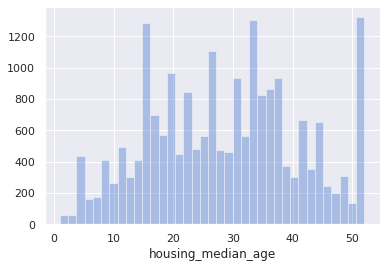

In [34]:
# we append a semi-colon ; to suppress some metadata from the plot
sns.distplot(housing_data['housing_median_age'], kde=False);

From this plot we can see a few of the values that we previously calculated. For example we see that the maximum value of housing age is about 50 years and that the most frequent value is around 30 years. Curiously, there is a _second peak_ around 15 years - why might that be the case? Asking these types of questions is often the first step in any exploratory data analysis.

---

#### Exercise #1

Create a histogram of the `median_income` attribute. Does it look like it was expressed in US dollars? What do you think might explain the possible range of values in the data?

---

#1_mla

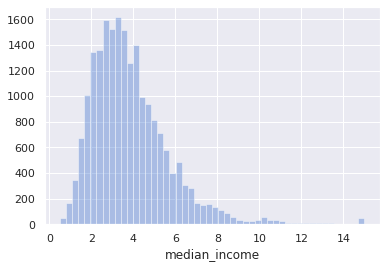

In [36]:
sns.distplot(housing_data['median_income'], kde=False)

#comm_mla

- The median income could be espressed in the monthly income, so it is possible, that it is expressed in US dollars.
- The data shows that most people who own a house earn roughly between 2'000 to 4'000 US dollar per month.

### Correlation matrix heatmap

To create the heatmap, we first need to calculate the correlation matrix of our numerical columns.

In [37]:
correlation_matrix = housing_data.corr()

We can examine why attributes correlate most strongly with the median house value, which will be the quantity we wish to predict when we start building models:

In [38]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

---

#### Exercise #2

* Which attribute is the most promising to predict the median house value?
* How can you interpret the small negative correlation between the latitude and the median house value?

---

#2_mla

1. The median income is the most promising to predict the median house value.
2. Because it does not matter at which altitude the house is located: The altitude does not say anything about the neighbourhood, income
    of the owner, age of the house or the distance to the sea. It seems that house buyers just do not care about at which altitude the
    house is located.
    From class: The further you are away from the ocean, the lower is the price.

Let's now build our heatmap! By default, seaborn uses strong positive correlations are shown in lighter shades:

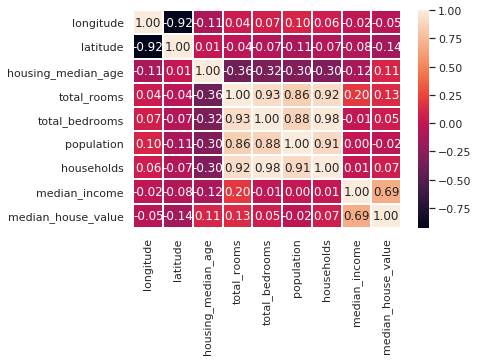

In [39]:
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=1);

---
**You should know**

Whenever you hear the word "correlation", most people are usually referring to the [_standard correlation coefficient_](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) $\rho_{X,Y}$ (also called _Pearson's r_) between a pair of random variables $X$ and $Y$: 

$$ \rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{\sigma_X\sigma_Y} \,,$$

where $\sigma_{X,Y}$ is the standard deviation of $X,Y$ and $\mathrm{cov}$ is the covariance. This coefficient ranges from -1 to 1; when it is close to 1 (-1) it means there is a strong positive (negative) correlation. When the coefficient is close to 0 it means there is no linear correlation. The figure below show various plots along with the correlation coefficient between their horizontal and vertical axes.

<br>
<div style="text-align: center">
<img src='images/correlation.png' width='650'>
<p style="text-align: center;"> <b>Figure:</b> Standard correlation coefficient of various datasets. (source: Wikipedia) </p>
</div>

---

### Scatter plots

Finally, another way to check for correlations is to examine the scatter plots of each numeric column. This can be useful for detecting _non-linear_ correlations which might be missed in the analysis above. Seaborn provides a handy `seaborn.pairplot` function that allows us to quicky see the relationships between the numeric data:

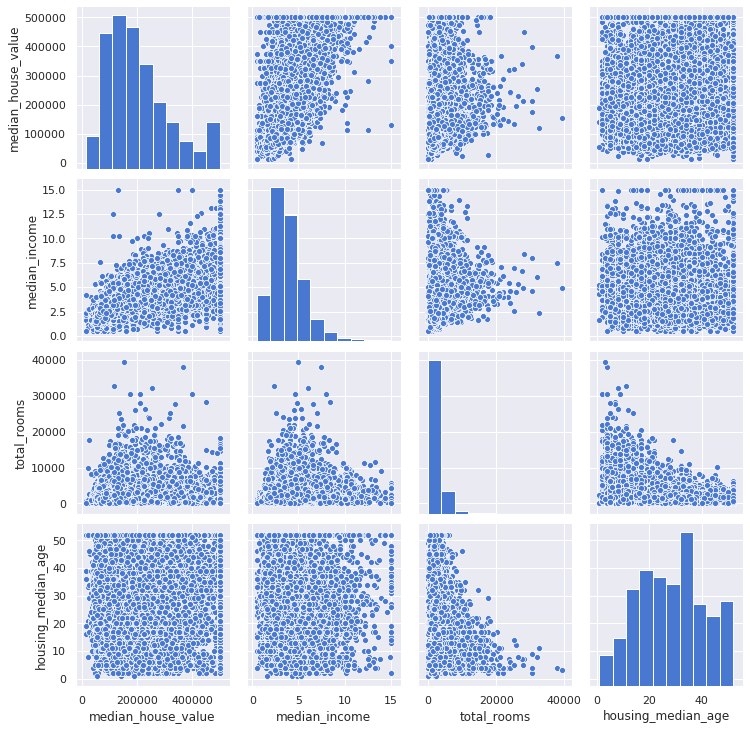

In [40]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing_data[attributes].dropna());

In many cases, a scatter plot can be too dense to interpret because there are many overlapping points. For such scenarios, _hexagon bin plots_ are very useful since they bin the spatial area of the chart and the intensity of a hexagon's color can be interpreted as points being more concentrated in this area. Let's make such a plot for the `median_income` and `median_house_value` variables using the `seaborn.jointplot` function:

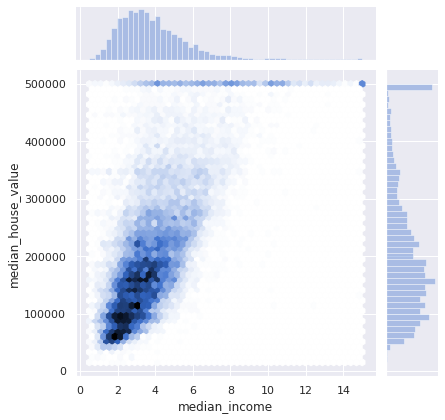

In [51]:
sns.jointplot('median_income', 'median_house_value', data=housing_data, kind='hex');

---

#### Exercise #3

Why do you think we see a horizontal line at around $500,000?

## answer mla
It indicates that there are more points outside of the range of the plot.

There are some houses which were sold for a higher price then the 500000 dollar shown on the y axis. It is important to pay attention to this values and build the algorithm therefore: Either you have to extend to the given values or, if the customer says, he wouldnt care, then let the model like that.

#### Exercise #4

Visit the seaborn [website](https://seaborn.pydata.org/) and explore the available plotting functions and apply them to attributes in the housing dataset.

---